In [ ]:
#Para modelagem e matrizes
import numpy as np
import pandas as pd

#Libs para analises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
#Ler os dados
BaseDados = pd.read_excel('Vase_004 - Magalu - Sem Resolução.xlsx')

#verificar dimensão
BaseDados.shape

(247, 7)

In [ ]:
BaseDados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [ ]:
BaseDados.info()
#Já estão todos no formato correto, não precisando de alteração

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [ ]:
#Series temporais
Dados = BaseDados.set_index('Data')
Dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


<ipython-input-7-eb73e0b561c7>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark') #Deixar o fundo cinza


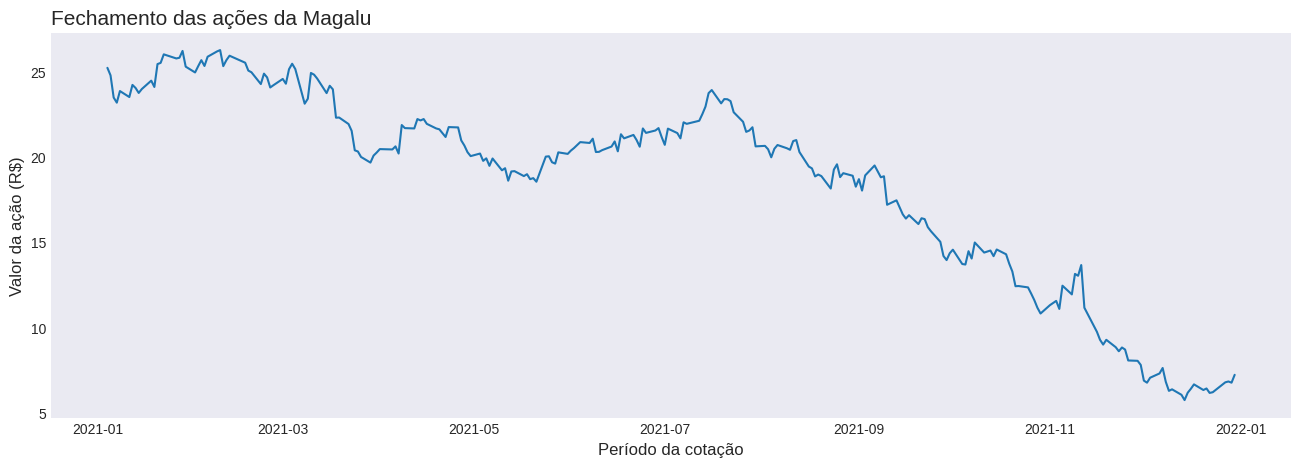

In [ ]:
#Serie temporal mostrando o fechamento das ações
plt.figure(figsize=(16,5))
plt.style.use('seaborn-dark') #Deixar o fundo cinza
plt.title('Fechamento das ações da Magalu', fontsize=15, loc='left')
plt.xlabel('Período da cotação', fontsize=12)
plt.ylabel('Valor da ação (R$)', fontsize=12)
plt.plot(Dados.index, Dados['Fechamento']);
# O gráfico mostra que as ações da Magalu despencaram em um ano. Antes era
# negociada por volta de 25 reais e no começo de 2022 já estava na casa dos 6
# reais

<ipython-input-8-75b5cf9d7c03>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


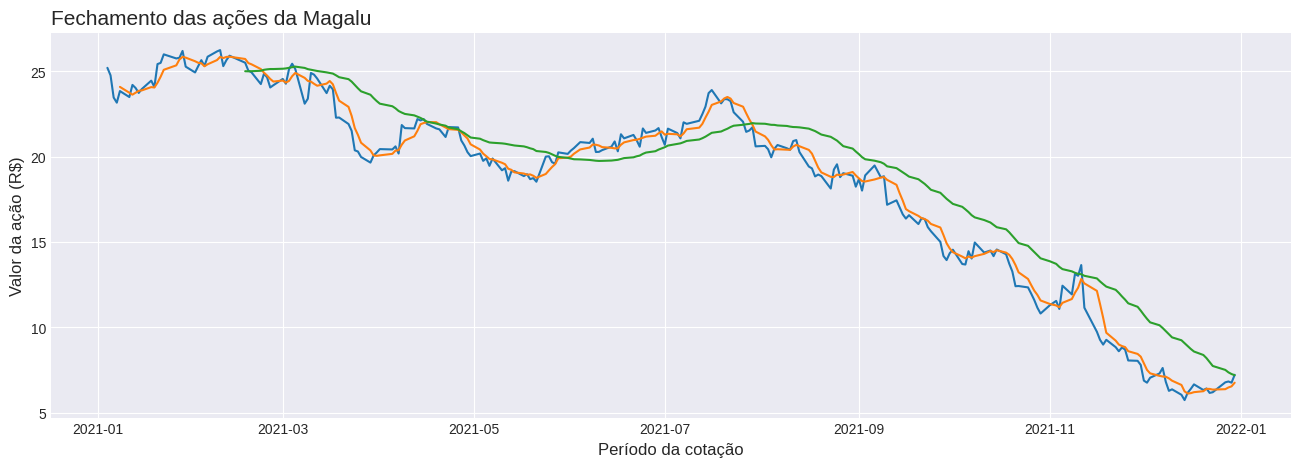

In [ ]:
MediaMovel = Dados['Fechamento'].rolling(5).mean() #aplicar média em janelas moveis, uma serie de dados
MediaTendencia = Dados['Fechamento'].rolling(30).mean()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title('Fechamento das ações da Magalu', fontsize=15, loc='left')
plt.xlabel('Período da cotação', fontsize=12)
plt.ylabel('Valor da ação (R$)', fontsize=12)

plt.plot(Dados.index, Dados['Fechamento'], label='Fechamento')
plt.plot(Dados.index, MediaMovel, label='Média Móvel')
plt.plot(Dados.index, MediaTendencia, label='Média de Tendência')

In [ ]:
#Preparando um gráfico oscilante, como o de ações, mostrando como foi a abertura e o fechamento das ações por dia.
Grafico = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Abertura'],
            high=Dados['Maior'],
            low=Dados['Menor'],
            close=Dados['Fechamento'],
        )
    ]
)

Grafico.show()